<a href="https://colab.research.google.com/github/Hacxmr/log-analysis/blob/main/Kyoto_2006.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas numpy tensorflow scikit-learn matplotlib seaborn tqdm

In [2]:
import pandas as pd
import glob
import os

# Use '**/*.txt' and recursive=True to include subfolders
data_path = '/content/kyoto_2006/**/*.txt'
all_files = glob.glob(data_path, recursive=True)

print("Number of .txt files found:", len(all_files))

df_list = []
for file in all_files:
    try:
        print(f"Reading: {os.path.basename(file)}")
        temp_df = pd.read_csv(file, sep='\t', header=None, engine='python', on_bad_lines='skip')
        df_list.append(temp_df)
    except Exception as e:
        print(f"Failed to read {file}: {e}")

# Combine all into one DataFrame
if df_list:
    df = pd.concat(df_list, ignore_index=True)
    print("✅ Loaded DataFrame with rows:", len(df))
else:
    print("❌ No files were loaded. Check file structure or permissions.")


Number of .txt files found: 61
Reading: 20061209.txt
Reading: 20061210.txt
Reading: 20061204.txt
Reading: 20061215.txt
Reading: 20061212.txt
Reading: 20061223.txt
Reading: 20061208.txt
Reading: 20061203.txt
Reading: 20061213.txt
Reading: 20061224.txt
Reading: 20061219.txt
Reading: 20061205.txt
Reading: 20061229.txt
Reading: 20061227.txt
Reading: 20061220.txt
Reading: 20061231.txt
Reading: 20061217.txt
Reading: 20061226.txt
Reading: 20061222.txt
Reading: 20061201.txt
Reading: 20061206.txt
Reading: 20061221.txt
Reading: 20061225.txt
Reading: 20061202.txt
Reading: 20061207.txt
Reading: 20061228.txt
Reading: 20061214.txt
Reading: 20061230.txt
Reading: 20061216.txt
Reading: 20061218.txt
Reading: 20061211.txt
Reading: 20061106.txt
Reading: 20061125.txt
Reading: 20061123.txt
Reading: 20061117.txt
Reading: 20061105.txt
Reading: 20061115.txt
Reading: 20061111.txt
Reading: 20061126.txt
Reading: 20061103.txt
Reading: 20061129.txt
Reading: 20061114.txt
Reading: 20061108.txt
Reading: 20061127.txt
R

In [3]:
print(df.head(3))

             0      1       2   3   4    5    6    7   8    9   ...  14  15  \
0      1.252083  other     923  93   0  0.0  0.0  0.0   1    3  ...   0   0   
1      0.000000  other       0   0   0  0.0  0.0  0.0   0  100  ...   0   0   
2  86363.919543  other  254104   0   0  0.0  0.0  0.0   0    0  ...   0   0   

   16 17                                       18     19  \
0   0  1  fda2:69aa:1f1a:8237:35f2:4d70:6362:4db0   3626   
1   0 -1  fda2:69aa:1f1a:92ff:388d:17e2:6ad4:37d1   6098   
2   0 -1  fda2:69aa:1f1a:977f:7df7:27d9:0737:2857  32770   

                                        20    21        22   23  
0  fda2:69aa:1f1a:b129:7d66:2701:078b:0f1e    25  00:00:03  tcp  
1  fda2:69aa:1f1a:38e1:7d58:27fb:6040:273c  3922  00:00:12  udp  
2  fda2:69aa:1f1a:7e8b:10eb:015a:0299:2af2  8649  00:00:15  udp  

[3 rows x 24 columns]


In [4]:
print("Number of columns:", df.shape[1])
print(df.head(3))


Number of columns: 24
             0      1       2   3   4    5    6    7   8    9   ...  14  15  \
0      1.252083  other     923  93   0  0.0  0.0  0.0   1    3  ...   0   0   
1      0.000000  other       0   0   0  0.0  0.0  0.0   0  100  ...   0   0   
2  86363.919543  other  254104   0   0  0.0  0.0  0.0   0    0  ...   0   0   

   16 17                                       18     19  \
0   0  1  fda2:69aa:1f1a:8237:35f2:4d70:6362:4db0   3626   
1   0 -1  fda2:69aa:1f1a:92ff:388d:17e2:6ad4:37d1   6098   
2   0 -1  fda2:69aa:1f1a:977f:7df7:27d9:0737:2857  32770   

                                        20    21        22   23  
0  fda2:69aa:1f1a:b129:7d66:2701:078b:0f1e    25  00:00:03  tcp  
1  fda2:69aa:1f1a:38e1:7d58:27fb:6040:273c  3922  00:00:12  udp  
2  fda2:69aa:1f1a:7e8b:10eb:015a:0299:2af2  8649  00:00:15  udp  

[3 rows x 24 columns]


In [5]:
import pandas as pd
import glob
import os
import numpy as np

data_path = '/content/kyoto_2006/**/*.txt'
all_files = glob.glob(data_path, recursive=True)

df_list = []
for file in all_files:
    try:
        temp_df = pd.read_csv(file, sep='\t', header=None, engine='python', on_bad_lines='skip', dtype=str)
        if temp_df.shape[1] == 24:
            df_list.append(temp_df)
    except Exception as e:
        print(f"Error reading {file}: {e}")

df = pd.concat(df_list, ignore_index=True)
print("✅ Loaded shape:", df.shape)


✅ Loaded shape: (4137899, 24)


In [6]:
from tensorflow.keras.utils import to_categorical
# Set column names (shortened for readability)
df.columns = [f'col{i}' for i in range(24)]

# Convert numeric columns to float
numeric_cols = ['col0', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8', 'col9', 'col10', 'col11', 'col15', 'col16', 'col19', 'col21']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with missing critical numeric values
df.dropna(subset=numeric_cols + ['col17'], inplace=True)

# Extract X and y
X = df[numeric_cols].astype(float).values
df['label'] = df['col17'].astype(int).map({-2: 0, -1: 1, 1: 2})  # 0=Unknown, 1=Known, 2=Normal

y = to_categorical(df['label'], num_classes=3)



In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(3, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(X_train, y_train, validation_split=0.1, epochs=15, batch_size=128)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
22617/22617 ━━━━━━━━━━━━━━━━━━━━ 65s 3ms/step - accuracy: 0.9678 - loss: 0.0993 - val_accuracy: 0.9775 - val_loss: 0.0620
Epoch 2/15
22617/22617 ━━━━━━━━━━━━━━━━━━━━ 60s 3ms/step - accuracy: 0.9764 - loss: 0.0675 - val_accuracy: 0.9787 - val_loss: 0.0578
Epoch 3/15
22617/22617 ━━━━━━━━━━━━━━━━━━━━ 87s 3ms/step - accuracy: 0.9776 - loss: 0.0656 - val_accuracy: 0.9788 - val_loss: 0.0556
Epoch 4/15
22617/22617 ━━━━━━━━━━━━━━━━━━━━ 59s 3ms/step - accuracy: 0.9783 - loss: 0.0621 - val_accuracy: 0.9810 - val_loss: 0.0557
Epoch 5/15
22617/22617 ━━━━━━━━━━━━━━━━━━━━ 59s 3ms/step - accuracy: 0.9786 - loss: 0.0653 - val_accuracy: 0.9800 - val_loss: 0.0551
Epoch 6/15
22617/22617 ━━━━━━━━━━━━━━━━━━━━ 56s 2ms/step - accuracy: 0.9788 - loss: 0.0667 - val_accuracy: 0.9787 - val_loss: 0.0555
Epoch 7/15
22617/22617 ━━━━━━━━━━━━━━━━━━━━ 57s 3ms/step - accuracy: 0.9791 - loss: 0.0621 - val_accuracy: 0.9796 - val_loss: 0.0536
Epoch 8/15
22617/22617 ━━━━━━━━━━━━━━━━━━━━ 58s 3ms/step - accuracy: 

In [8]:
loss, acc = model.evaluate(X_test, y_test)
print(f"🎯 Test Accuracy: {acc:.4f}")


25130/25130 ━━━━━━━━━━━━━━━━━━━━ 50s 2ms/step - accuracy: 0.9807 - loss: 0.0518
🎯 Test Accuracy: 0.9809


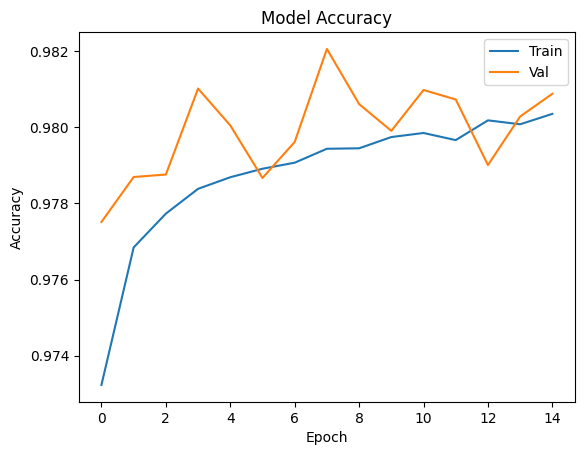

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
